In [2]:
from keras import layers, models

/home/jk/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
def ANN_models_func(Nin, Nh, Nout):
    x = layers.Input(shape=(Nin),)
    h = layers.Activation('relu')(layers.Dense(Nh)(x))
    y = layers.Activation('softmax')(layers.Dense(Nout)(h))
    model = models.Model(x, y)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [5]:
def ANN_seq_func(Nin, Nh, Nout):
    model = models.Sequential()
    model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
    model.add(layers.Dense(Nout, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [15]:
class ANN_models_class(models.Model):
    def __init__(self, Nin, Nh, Nout):
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')
        
        x = layers.Input(shape=Nin,)
        h = relu(hidden(x))
        y = softmax(output(h))
        
        super().__init__(x,y)
        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        
class ANN_seq_class(models.Sequential):
    def __init__(self, Nin, Nh, Nout):
        super().__init__()
        self.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])       

In [16]:
import numpy as np
from keras import datasets
from keras.utils import np_utils

In [17]:
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
    
    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)
    
    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)
    
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    
    return (X_train, Y_train), (X_test, Y_test)    

In [18]:
import matplotlib.pyplot as plt

In [23]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

In [24]:
def plot_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

In [25]:
def main():
    Nin = 784
    Nh = 100
    number_of_class = 10
    Nout = number_of_class
    
    model = ANN_seq_class(Nin, Nh, Nout)
    (X_train, Y_train), (X_test, Y_test) = Data_func()
    
    history = model.fit(X_train, Y_train, epochs = 15, batch_size = 100, validation_split = 0.2)
    performance_test = model.evaluate(X_test, Y_test, batch_size = 100)
    print('Test Loss and Accuracy ->', performance_test)
    
    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 2s 46us/step - loss: 0.3971 - acc: 0.8895 - val_loss: 0.2157 - val_acc: 0.9379
Epoch 2/15
48000/48000 [==============================] - 2s 42us/step - loss: 0.1893 - acc: 0.9466 - val_loss: 0.1613 - val_acc: 0.9547
Epoch 3/15
48000/48000 [==============================] - 2s 43us/step - loss: 0.1381 - acc: 0.9606 - val_loss: 0.1350 - val_acc: 0.9603
Epoch 4/15
48000/48000 [==============================] - 2s 42us/step - loss: 0.1094 - acc: 0.9684 - val_loss: 0.1255 - val_acc: 0.9648
Epoch 5/15
48000/48000 [==============================] - 2s 38us/step - loss: 0.0890 - acc: 0.9746 - val_loss: 0.1113 - val_acc: 0.9671
Epoch 6/15
48000/48000 [==============================] - 2s 39us/step - loss: 0.0743 - acc: 0.9787 - val_loss: 0.1047 - val_acc: 0.9697
Epoch 7/15
48000/48000 [==============================] - 2s 40us/step - loss: 0.0625 - acc: 0.9825 - val_loss: 0.1000 - val_acc

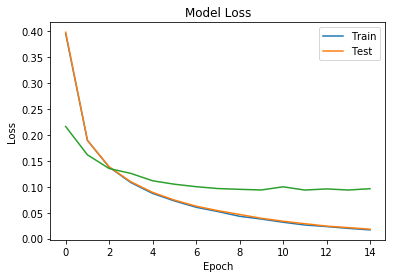

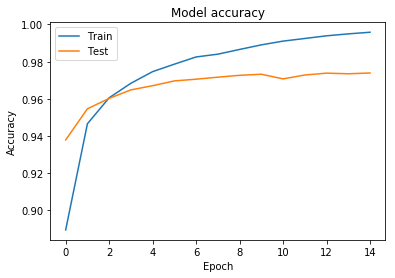

In [26]:
if __name__ == '__main__':
    main()